# Capsnets train + test

First, import stuff

In [1]:
import model
import data_loader
import tensorflow as tf

W0405 20:46:18.476655 4441853376 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [24]:
import warnings
warnings.filterwarnings('ignore')
tf.logging.set_verbosity(tf.logging.ERROR)

## Load word vectors and data

In [2]:
word2vec_path = '../../romanian_word_vecs/cc.ro.300.vec'

# No diacritics data
training_data_paths = [
        '../data-capsnets/scenario0/train.txt',
        '../data-capsnets/scenario1/train.txt',
        '../data-capsnets/scenario2/train.txt',
        '../data-capsnets/scenario3.1/train.txt',
        '../data-capsnets/scenario3.2/train.txt',
        '../data-capsnets/scenario3.3/train.txt',
    ]
test_data_paths = [
    '../data-capsnets/scenario0/test.txt',
    '../data-capsnets/scenario1/test.txt',
    '../data-capsnets/scenario2/test.txt',
    '../data-capsnets/scenario3.1/test.txt',
    '../data-capsnets/scenario3.2/test.txt',
    '../data-capsnets/scenario3.3/test.txt',
]

# Diacritics data
dia_training_data_paths = [
        '../data-capsnets/diacritics/scenario0/train.txt',
        '../data-capsnets/diacritics/scenario1/train.txt',
        '../data-capsnets/diacritics/scenario2/train.txt',
        '../data-capsnets/diacritics/scenario3.1/train.txt',
        '../data-capsnets/diacritics/scenario3.2/train.txt',
        '../data-capsnets/diacritics/scenario3.3/train.txt',
    ]
dia_test_data_paths = [
    '../data-capsnets/diacritics/scenario0/test.txt',
    '../data-capsnets/diacritics/scenario1/test.txt',
    '../data-capsnets/diacritics/scenario2/test.txt',
    '../data-capsnets/diacritics/scenario3.1/test.txt',
    '../data-capsnets/diacritics/scenario3.2/test.txt',
    '../data-capsnets/diacritics/scenario3.3/test.txt',
]
scenario_nums = [
    
]


In [3]:
print('------------------load word2vec begin-------------------')
w2v = data_loader.load_w2v(word2vec_path)
print('------------------load word2vec end---------------------')

------------------load word2vec begin-------------------


/Users/andastoica/Master/Project/code/nlu/andi-capsnet-arch/venv/lib/python3.7/site-packages/smart_open/smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyboardInterrupt: 

In [25]:
data = data_loader.read_datasets(w2v, training_data_paths[0], test_data_paths[0], test=True)

------------------read datasets begin-------------------
------------------read datasets end---------------------


# Train model

First, set the flags

In [26]:
def set_flags(data, scenario):
    FLAGS = tf.app.flags.FLAGS

    tf.app.flags.DEFINE_boolean('save_model', False, 'save model to disk')
    tf.app.flags.DEFINE_string('summaries_dir', './logs', 'tensorboard summaries')
    tf.app.flags.DEFINE_string('ckpt_dir', './saved_models/', 'check point dir')
    tf.app.flags.DEFINE_string('scenario_num', scenario, 'Scenario number')
    tf.app.flags.DEFINE_string('errors_dir', './errors/', 'Errors dir')
    
    vocab_size, word_emb_size = data['embedding'].shape
    _, max_sentence_length = data['x_tr'].shape
    intents_number = len(data['intents_dict'])
    slots_number = len(data['slots_dict'])
    hidden_size = 64

    tf.app.flags.DEFINE_float('keep_prob', 0.8, 'embedding dropout keep rate for training')
    tf.app.flags.DEFINE_integer('hidden_size', hidden_size, 'embedding vector size')
    tf.app.flags.DEFINE_integer('batch_size', 32, 'batch size')
    tf.app.flags.DEFINE_integer('num_epochs', 20, 'num of epochs')
    tf.app.flags.DEFINE_integer('vocab_size', vocab_size, 'vocab size of word vectors')
    tf.app.flags.DEFINE_integer('max_sentence_length', max_sentence_length, 'max number of words in one sentence')
    tf.app.flags.DEFINE_integer('intents_nr', intents_number, 'intents_number')  #
    tf.app.flags.DEFINE_integer('slots_nr', slots_number, 'slots_number')  #
    tf.app.flags.DEFINE_integer('word_emb_size', word_emb_size, 'embedding size of word vectors')
    tf.app.flags.DEFINE_boolean('use_embedding', True, 'whether to use embedding or not.')
    tf.app.flags.DEFINE_float('learning_rate', 0.01, 'learning rate')
    tf.app.flags.DEFINE_integer('slot_routing_num', 2, 'slot routing num')
    tf.app.flags.DEFINE_integer('intent_routing_num', 3, 'intent routing num')
    tf.app.flags.DEFINE_integer('intent_output_dim', 16, 'intent output dimension')
    tf.app.flags.DEFINE_integer('slot_output_dim', 2 * hidden_size, 'slot output dimension')
    tf.app.flags.DEFINE_integer('d_a', 20, 'self attention weight hidden units number')
    tf.app.flags.DEFINE_integer('r', 5, 'number of self attention heads')
    tf.app.flags.DEFINE_float('alpha', 0.0001, 'coefficient for self attention loss')
    tf.app.flags.DEFINE_integer('n_splits', 3, 'Number of cross-validation splits')
    
    tf.app.flags.DEFINE_string('f', '', 'kernel') # Without this there's an error: unknown command line flag 'f'
    
    return FLAGS

In [28]:
def del_all_flags(FLAGS):
    flags_dict = FLAGS._flags()
    keys_list = [keys for keys in flags_dict]
    for keys in keys_list:
        FLAGS.__delattr__(keys)
        
del_all_flags(FLAGS)

In [ ]:
import train

FLAGS = set_flags(data, scenario="nb")
train.train(data, FLAGS)


# Test

Restoring Variables from Checkpoint for testing
           TEST SET PERFORMANCE        
Intent detection
                          precision    recall  f1-score   support

           aprindeLumina     1.0000    1.0000    1.0000        30
 cresteIntensitateLumina     1.0000    1.0000    1.0000        30
       cresteTemperatura     1.0000    1.0000    1.0000        30
           opresteMuzica     1.0000    1.0000    1.0000        30
               opresteTV     1.0000    1.0000    1.0000        30
              pornesteTV     1.0000    1.0000    1.0000        30
              puneMuzica     1.0000    1.0000    1.0000        30
  scadeIntensitateLumina     1.0000    1.0000    1.0000        30
        scadeTemperatura     1.0000    1.0000    1.0000        30
          schimbaCanalTV     1.0000    1.0000    1.0000        30
schimbaIntensitateMuzica     1.0000    1.0000    1.0000        30
      seteazaTemperatura     1.0000    1.0000    1.0000        30
            stingeLumina     1.0000 

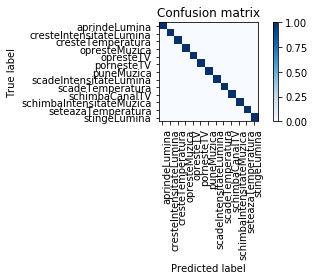

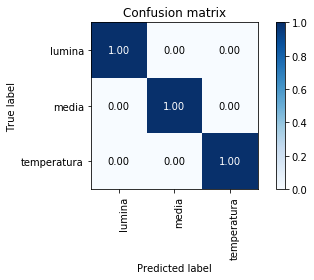

Intent F1: 1.000000
Slot F1: 0.994312


In [29]:
import test
FLAGS = set_flags(data, scenario='0')
test.test(data, FLAGS)